<h3> Importing Libraries

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import validation_curve

In [174]:
df = pd.read_csv("houses_to_rent_v2.csv")
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Sum of Null values

In [175]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

Describe dataset

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


<h3>Cleaning Data</h3>

Floor feature is missing value. Also we need to convert object datas to numerical datas in order to use our model.

    I filled missing value in floor feature with mean.

    I replaced object datas with numberical.

animal: accept-1, not accept-0
furniture: furnished-1,not furnished-0
city: São Paulo-1,Porto Alegre-2,Rio de Janeiro-3,Campinas-4,Belo Horizonte-5 

In [177]:
df['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [178]:
df["floor"] = df["floor"].replace("-",np.nan)
df["floor"] = pd.to_numeric(df["floor"])

In [179]:
print(np.mean(df["floor"])) # mean

df["floor"] = df["floor"].fillna(int(np.mean(df["floor"])))

6.583282711699672


In [180]:
df["animal"] = df["animal"].replace("acept",1)
df["animal"] = df["animal"].replace("not acept",0)
df["furniture"] = df["furniture"].replace("furnished",1)
df["furniture"] = df["furniture"].replace("not furnished",0)

In [181]:
cities = {"São Paulo" : 1, "Porto Alegre" : 2, "Rio de Janeiro": 3, "Campinas":4, "Belo Horizonte":5} 
df["city"] = df["city"].replace(cities)

In [182]:
df1 = df.rename(columns={"hoa (R$)": "hoa", "rent amount (R$)": "rentamount", "parking spaces":"parkingspaces", "property tax (R$)": "propertytax", "fire insurance (R$)": "fireinsurance", "total (R$)": "total"})

In [183]:
df1.head()

,city,area,rooms,bathroom,parkingspaces,floor,animal,furniture,hoa,rentamount,propertytax,fireinsurance,total
0,1,70,2,1,1,7.0,1,1,2065,3300,211,42,5618
1,1,320,4,4,0,20.0,1,0,1200,4960,1750,63,7973
2,2,80,1,1,1,6.0,1,0,1000,2800,0,41,3841
3,2,51,2,1,0,2.0,1,0,270,1112,22,17,1421
4,1,25,1,1,0,1.0,0,0,0,800,25,11,836


In [184]:
column_names=['city','area','rooms','bathroom','parkingspaces','floor','animal','furniture','hoa','propertytax','fireinsurance','total','rentamount']

df1 = df1.reindex(columns=column_names)

<h4> Reaarange columns

In [185]:
df1.head()

,city,area,rooms,bathroom,parkingspaces,floor,animal,furniture,hoa,propertytax,fireinsurance,total,rentamount
0,1,70,2,1,1,7.0,1,1,2065,211,42,5618,3300
1,1,320,4,4,0,20.0,1,0,1200,1750,63,7973,4960
2,2,80,1,1,1,6.0,1,0,1000,0,41,3841,2800
3,2,51,2,1,0,2.0,1,0,270,22,17,1421,1112
4,1,25,1,1,0,1.0,0,0,0,25,11,836,800


In [186]:
df1.shape

(10692, 13)

<h3>Correlation matrix

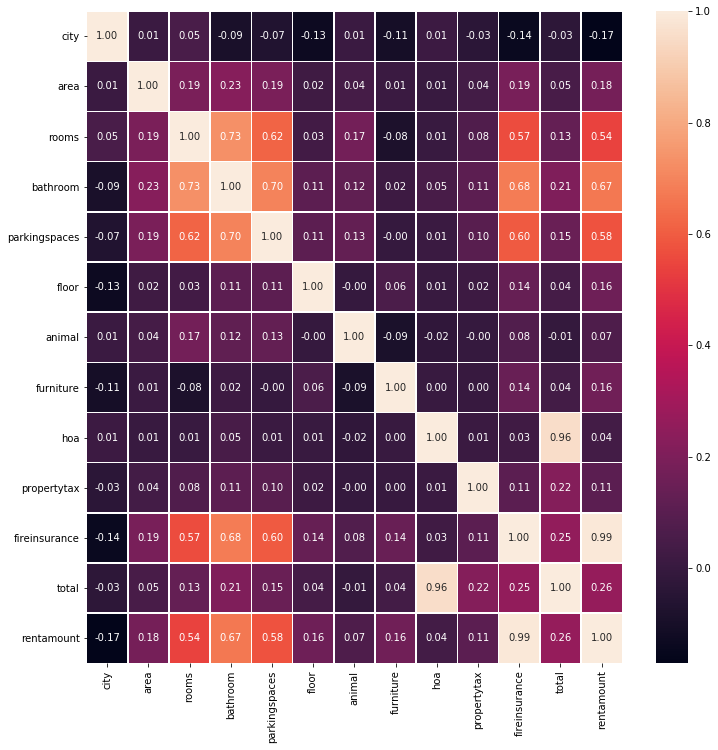

In [187]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df1.corr(),annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [188]:
#sns.pairplot(df1)

Distribution of Rent Amount

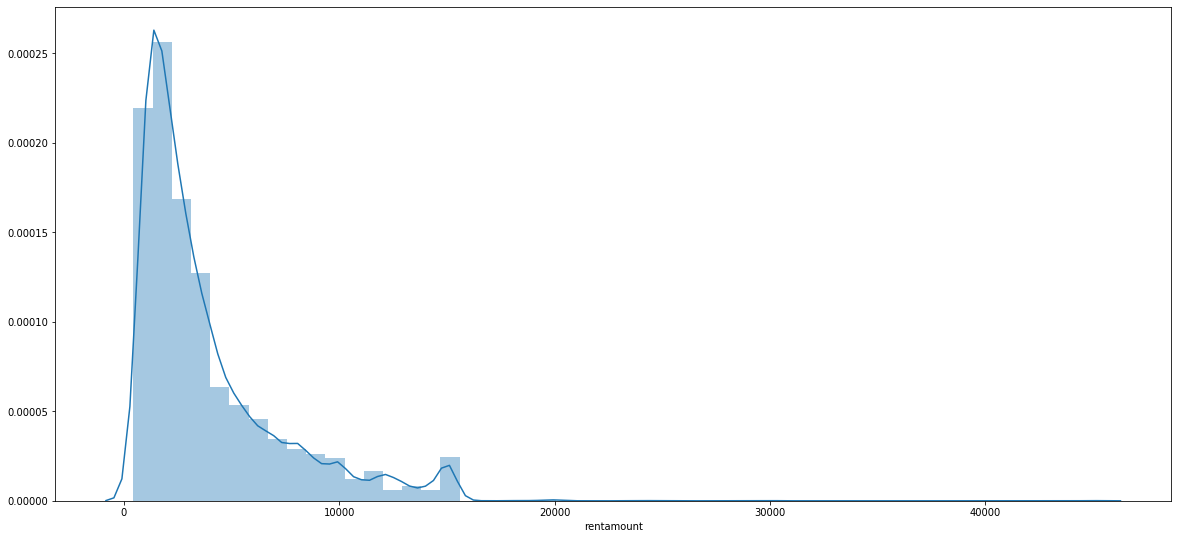

In [195]:
plt.figure(figsize =(20,20))
plt.subplot(2, 1, 1)
ax = sns.distplot(df1['rentamount'],kde =True)

Boxplot of Rent Amount

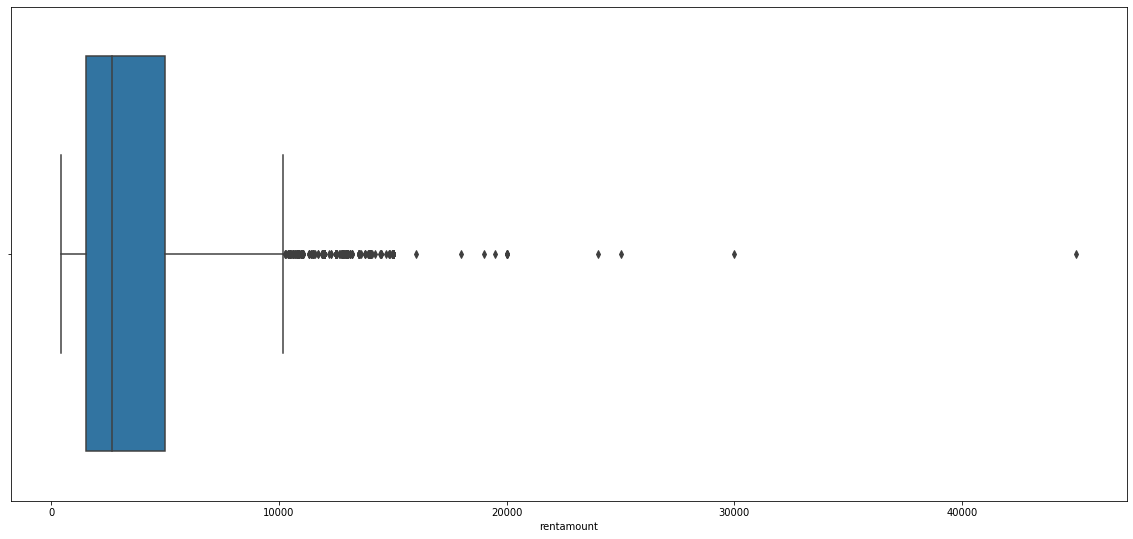

In [196]:
plt.figure(figsize =(20,20))
plt.subplot(2, 1, 2)
sns.boxplot(df1['rentamount'])

Mostly the range is in between 450 -10000
The Data is Right Skewed
Potential outliers are there which are more than 10000
The minimum rent is 450
The maximum rent is 45000

<h3>
Significance of No of Rooms with the Total Rent¶


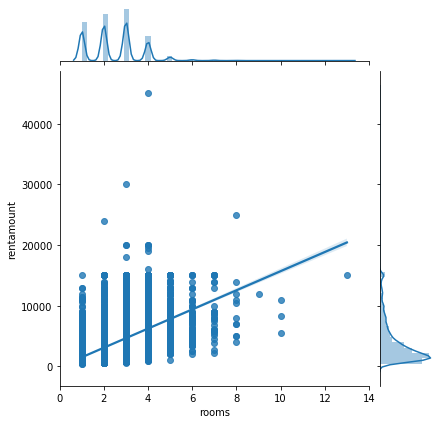

In [197]:
sns.jointplot(y= df1['rentamount'],x = df1['rooms'],kind ='reg')

This is quite interesting the number of rooms does have a great impact in the rent and it is also astonishing to see that the highest rent is given to 3 Roomed house We can finally came to a conclusion that when the room is more than 2, the rent increases...

<h4> Count plot for Animals based on City

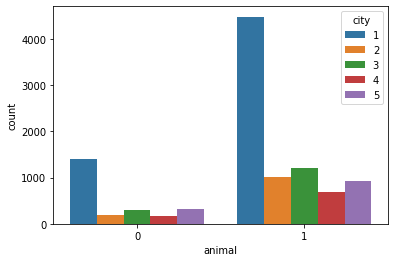

In [67]:
sns.countplot(df1['animal'],hue = df1['city'])

Sao Paulo are mostly accepting pets and mostly all the other cities are also accepting the pets and if you see the ratio of pet acceptance to non acceptance in all the cities its nearly 70:30

In [68]:
#sns.boxplot(df1['rent amount'],y =df1['animal'])

Distribution of Rooms based on City

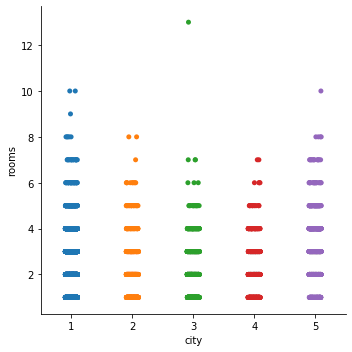

In [69]:
sns.catplot(x = 'city', y='rooms', data =df1)



    Rio de Janeiro is the city which has the maxmimum no.of rooms in a house(upto 12 Rooms)
    Then comes São Paulo and Belo Horizonte which has upto 10 Roomed houses
    Campinas has upto 7 Roomed houses



Rent Amount distribution based on the City

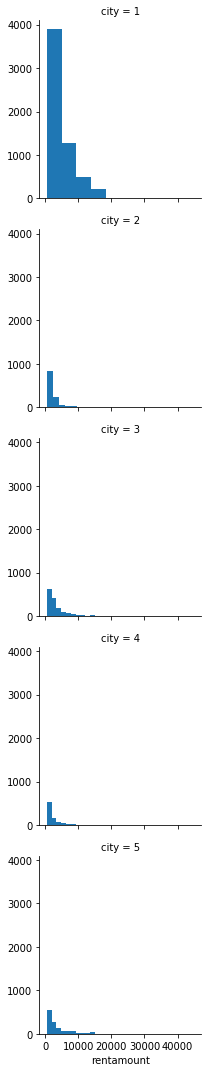

In [70]:
g = sns.FacetGrid(df1, row = 'city')
g = g.map(plt.hist,'rentamount')



    São Paulo is highly opted for rental house the reason may be availability of more room and allowance of having pets as we seen in former analysis
    Campinas is lessly opted for rental house



Distribution of bathroom

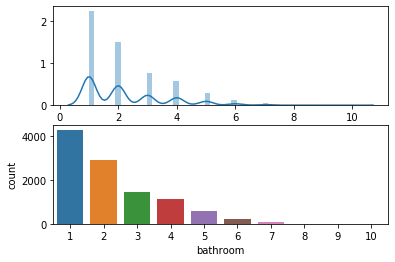

In [71]:
plt.subplot(2,1,1)
sns.distplot(df1['bathroom'])
plt.subplot(2,1,2)
sns.countplot(df1['bathroom'])


    Mostly they are looking for only one or two bathrooms
    There are also quite a number of people who prefer (3-5) bathrooms
    There are very little amount people who looks for more than 5 bathrooms


Catplot for Bathroom and RentAmount

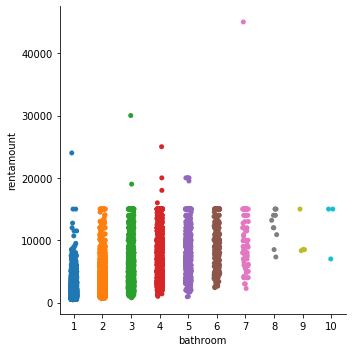

In [72]:
sns.catplot(x ='bathroom', y ='rentamount', data = df1)



Interesting fact is that the highest rent is given to the house with 7 bathrooms

ViolinPlot for Furniture and Rent Amount

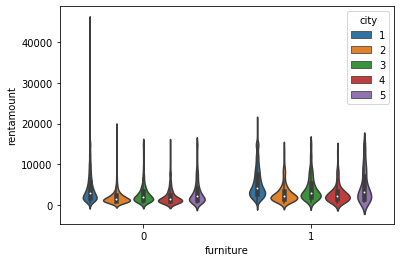

In [73]:
sns.violinplot(x ='furniture', y ='rentamount', data = df1,hue ='city')



Non-Furnished homes are more costly and they are highly opted!!!
Sao Paulo is the city with more non-furnitured houses


Distribution of parking spaces

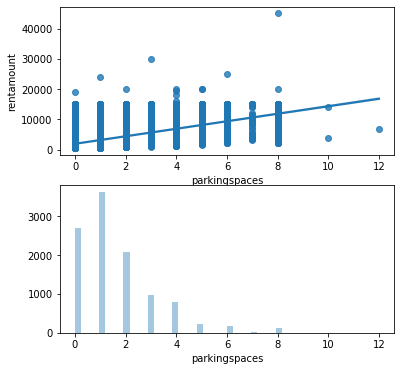

In [74]:
plt.figure(figsize =(6,6))
plt.subplot(2,1,1)
ax = sns.regplot(df1['parkingspaces'],df1['rentamount'])
plt.subplot(2,1,2)
sns.distplot(df1['parkingspaces'],kde =False)



There is very less correlation between the parking spaces and the rent amount and mostly people are choosing houses with 0 to 2 parking spaces


ViolinPlot for City and Fire Insurance

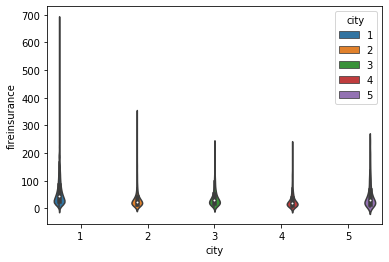

In [75]:
sns.violinplot(x ='city', y ='fireinsurance', data = df1,hue ='city')

SaoPaulo is the city which has more fire insurance amount followed by Porto Alegre, Belo Horizonte, Rio De Janerio and atlast Campinas

Regression Plot of Fire Insurance and RentAmount

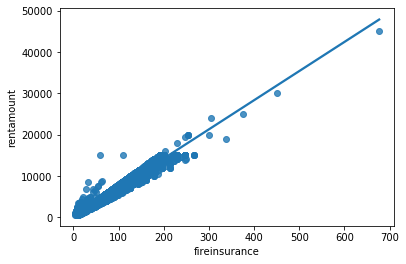

In [76]:
ax = sns.regplot(df1['fireinsurance'],df1['rentamount'])

There is very high correlation with Fire Insurance amount and the rent amount, if the fire insurance is more then the rent will also be more and vice versa

JointPlot of RentAmount and Property Tax

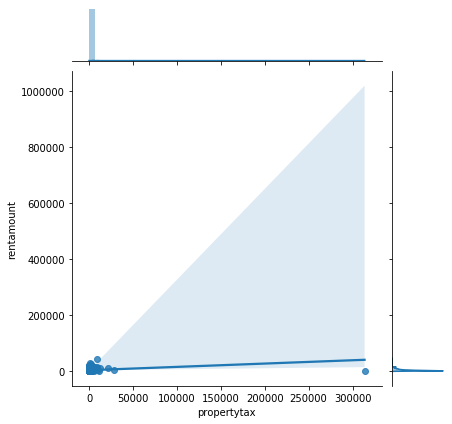

In [77]:
sns.jointplot(y= df1['rentamount'],x = df1['propertytax'],kind ='reg')

No impact

Rent Amount distribution based on the city

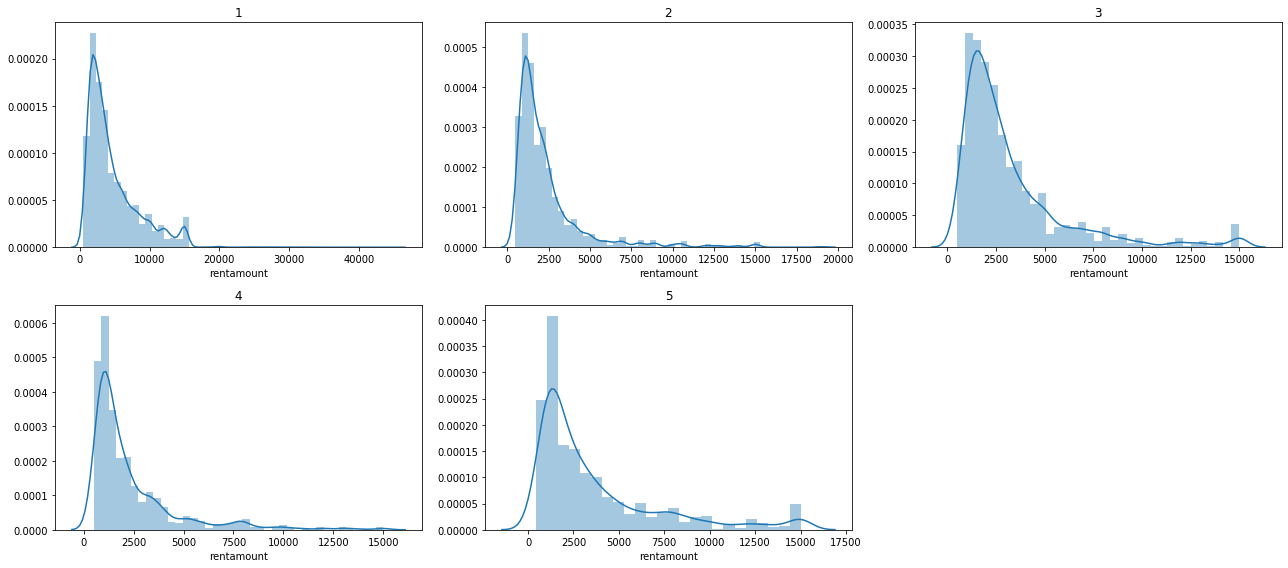

In [78]:
plt.figure(figsize=(18, 8))

i = 1
for city in df1['city'].unique():
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = df1.loc[df1['city'] == city]
    sns.distplot(city_name['rentamount'])
    i+=1
    

plt.tight_layout()
plt.show()

In [79]:
df1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parkingspaces', 'floor', 'animal',
       'furniture', 'hoa', 'propertytax', 'fireinsurance', 'total',
       'rentamount'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
#df2 = df1.drop(['animal'], axis = 1)
df2 = df1

In [82]:
df2.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parkingspaces', 'floor', 'animal',
       'furniture', 'hoa', 'propertytax', 'fireinsurance', 'total',
       'rentamount'],
      dtype='object')

In [83]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])

7484
7484
3208
3208


In [84]:
X.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parkingspaces', 'floor', 'animal',
       'furniture', 'hoa', 'propertytax', 'fireinsurance', 'total'],
      dtype='object')

<h3> Correlation Matrix

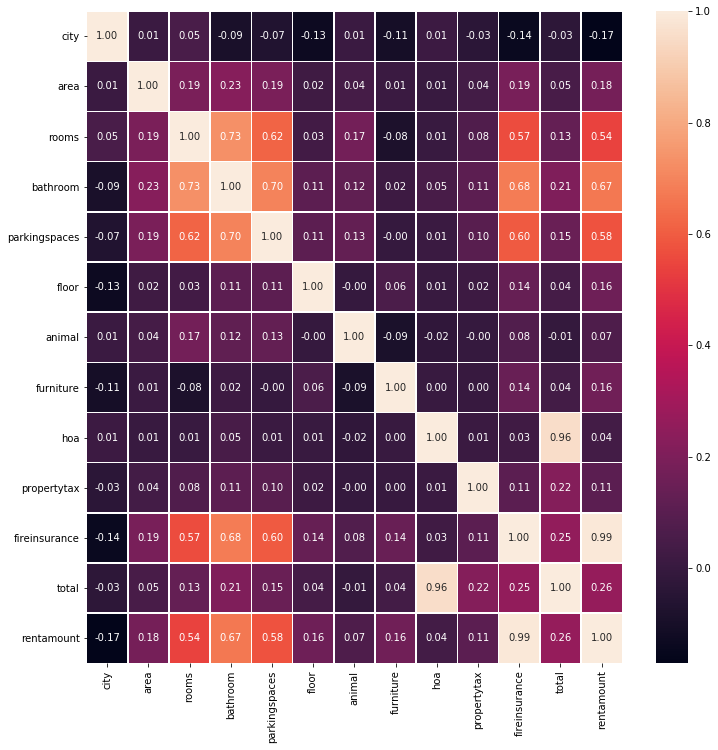

In [85]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df2.corr(),annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, max_error

<h3> Linear Regression

In [87]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [88]:
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])
X.columns

7484
7484
3208
3208


Index(['city', 'area', 'rooms', 'bathroom', 'parkingspaces', 'floor', 'animal',
       'furniture', 'hoa', 'propertytax', 'fireinsurance', 'total'],
      dtype='object')

In [89]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print("R2 Score: ",r2_score(y_test, predictions))
print("Root Mean Square Error: ",mean_squared_error(y_test, predictions, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, predictions, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, predictions))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, predictions))
print("Max_Error: ", max_error(y_test, predictions))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, predictions))*(3207/(3208-12-1))))

R2 Score:  0.9999973089670018
Root Mean Square Error:  5.406039658302838
Mean Square Error:  29.225264787143065
Explained_Variance_score:  0.9999973091212525
Mean_Absolute_Error:  0.6092611713121123
Max_Error:  300.02841529324223
Adjusted R2:  0.9999972988598356


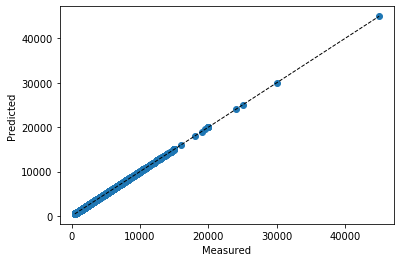

In [90]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Ridge Regression

In [91]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [92]:
rm = Ridge()
rm.fit(X_train,y_train)
rmpredict = rm.predict(X_test)

print("R2 Score: ",r2_score(y_test, rmpredict))
print("Root Mean Square Error: ",mean_squared_error(y_test, rmpredict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, rmpredict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, rmpredict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, rmpredict))
print("Max_Error: ", max_error(y_test, rmpredict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, rmpredict))*(3207/(3208-12-1))))

R2 Score:  0.9999973089680755
Root Mean Square Error:  5.40603857983229
Mean Square Error:  29.225253126635128
Explained_Variance_score:  0.9999973091223235
Mean_Absolute_Error:  0.6092380711764399
Max_Error:  300.0284249086917
Adjusted R2:  0.9999972988609134


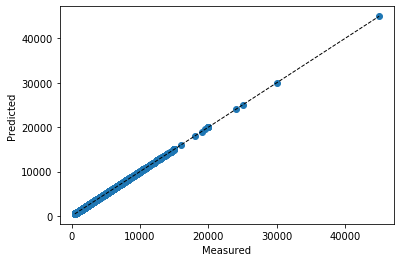

In [93]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(rm, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Lasso Regression

In [94]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
#

In [95]:
lassom = Lasso()
lassom.fit(X_train,y_train)
lassom_predict = lassom.predict(X_test)

print("R2 Score: ",r2_score(y_test, lassom_predict))
print("Root Mean Square Error: ",mean_squared_error(y_test, lassom_predict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, lassom_predict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, lassom_predict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, lassom_predict))
print("Max_Error: ", max_error(y_test, lassom_predict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, lassom_predict))*(3207/(3208-12-1))))

R2 Score:  0.9944383358033269
Root Mean Square Error:  245.76616767216805
Mean Square Error:  60401.00917226422
Explained_Variance_score:  0.9944383399326516
Mean_Absolute_Error:  158.72091106535865
Max_Error:  2771.4957727009023
Adjusted R2:  0.9944174469237149


C:\Users\Parth Shah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239824337.2919872, tolerance: 8933642.712968467
  positive)


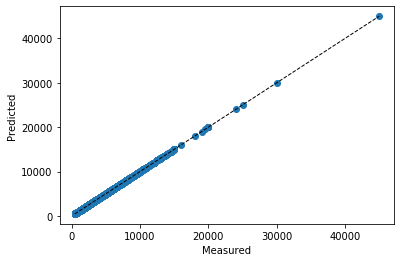

In [96]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lassom, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Kernel Ridge

In [97]:
from sklearn.kernel_ridge import KernelRidge

In [98]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [99]:
clf = KernelRidge()
clf.fit(X_train, y_train)
clfpredict = clf.predict(X_test)

print("R2 Score: ",r2_score(y_test, clfpredict))
print("Root Mean Square Error: ",mean_squared_error(y_test, clfpredict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, clfpredict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, clfpredict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, clfpredict))
print("Max_Error: ", max_error(y_test, clfpredict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, clfpredict))*(3207/(3208-12-1))))

R2 Score:  0.9999973120546944
Root Mean Square Error:  5.402937321867018
Mean Square Error:  29.191731704023542
Explained_Variance_score:  0.9999973120574395
Mean_Absolute_Error:  0.5838353123302175
Max_Error:  299.92132568359375
Adjusted R2:  0.9999973019591252


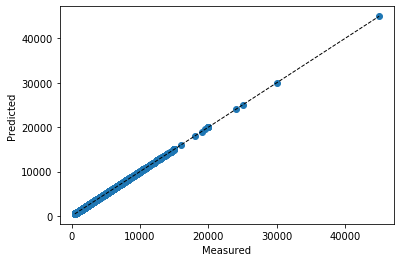

In [100]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(clf, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> SVR

In [101]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [102]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [103]:
y1 = y[:7484]
y2 = y[7484:]

In [104]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [105]:
regrpredict = regr.predict(X_test)

print("R2 Score: ",r2_score(y_test, regrpredict))
print("Root Mean Square Error: ",mean_squared_error(y_test, regrpredict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, regrpredict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, regrpredict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, regrpredict))
print("Max_Error: ", max_error(y_test, regrpredict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, regrpredict))*(3207/(3208-12-1))))

R2 Score:  0.12210721997812846
Root Mean Square Error:  3087.7380838156587
Mean Square Error:  9534126.474245595
Explained_Variance_score:  0.22545393695624272
Mean_Absolute_Error:  1882.6124399162122
Max_Error:  20780.72433118832
Adjusted R2:  0.11880997010011207


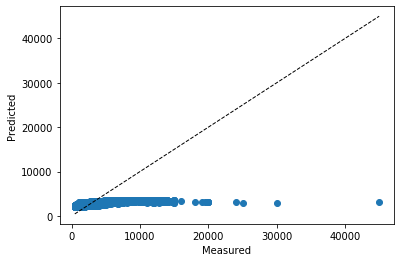

In [106]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Elastic Net Regression

In [107]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [108]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train,y_train)
elasticnet_model_predict = elasticnet_model.predict(X_test)

C:\Users\Parth Shah\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235359934.27547112, tolerance: 8933642.712968467
  positive)


In [109]:
print("R2 Score: ",r2_score(y_test, elasticnet_model_predict))
print("Root Mean Square Error: ",mean_squared_error(y_test, elasticnet_model_predict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, elasticnet_model_predict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, elasticnet_model_predict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, elasticnet_model_predict))
print("Max_Error: ", max_error(y_test, elasticnet_model_predict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, elasticnet_model_predict))*(3207/(3208-12-1))))

R2 Score:  0.9946120431445441
Root Mean Square Error:  241.89771747475623
Mean Square Error:  58514.505719496985
Explained_Variance_score:  0.9946121032924016
Mean_Absolute_Error:  154.62336382650977
Max_Error:  2755.537283637086
Adjusted R2:  0.994591806686871


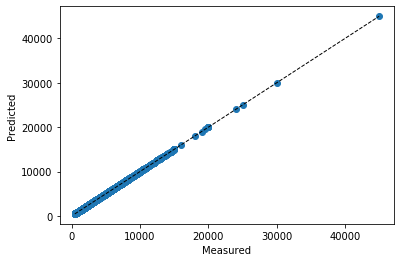

In [110]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(elasticnet_model, df2, df2.rentamount, cv=12)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Decision Tree Regressor

In [111]:
from sklearn.tree import DecisionTreeRegressor as dtr

In [112]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [113]:
model = dtr()
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [114]:
print("R2 Score: ",r2_score(y_test, predict))
print("Root Mean Square Error: ",mean_squared_error(y_test, predict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, predict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, predict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, predict))
print("Max_Error: ", max_error(y_test, predict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, predict))*(3207/(3208-12-1))))

R2 Score:  0.9921872810366668
Root Mean Square Error:  291.2868082763284
Mean Square Error:  84848.00467581047
Explained_Variance_score:  0.9921887508582419
Mean_Absolute_Error:  70.6817331670823
Max_Error:  6000.0
Adjusted R2:  0.9921579374912646


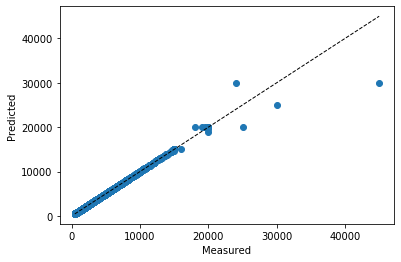

In [115]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, df2, df2.rentamount, cv=12)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [117]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [118]:
model = rfr()
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [119]:
print("R2 Score: ",r2_score(y_test, predict))
print("Root Mean Square Error: ",mean_squared_error(y_test, predict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, predict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, predict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, predict))
print("Max_Error: ", max_error(y_test, predict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, predict))*(3207/(3208-12-1))))

R2 Score:  0.9946111332434344
Root Mean Square Error:  241.91814207314206
Mean Square Error:  58524.38746412095
Explained_Variance_score:  0.9946200536437548
Mean_Absolute_Error:  65.54284600997507
Max_Error:  5349.2
Adjusted R2:  0.9945908933682924


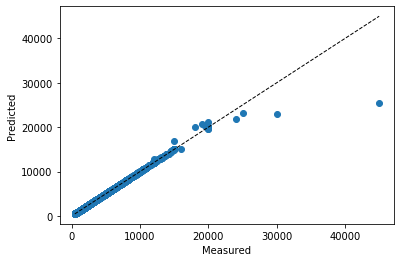

In [120]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, df2, df2.rentamount, cv=12)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> KNeighborsRegressor

In [121]:
from sklearn.neighbors import KNeighborsRegressor as knr

In [122]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [123]:
model = knr(n_neighbors=2)
model.fit(X_train,y_train)

predict = model.predict(X_test)

In [124]:
print("R2 Score: ",r2_score(y_test, predict))
print("Root Mean Square Error: ",mean_squared_error(y_test, predict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, predict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, predict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, predict))
print("Max_Error: ", max_error(y_test, predict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, predict))*(3207/(3208-12-1))))

R2 Score:  0.9869320449036386
Root Mean Square Error:  376.7242114175893
Mean Square Error:  141921.1314682045
Explained_Variance_score:  0.9869511477461799
Mean_Absolute_Error:  71.44466957605985
Max_Error:  11750.0
Adjusted R2:  0.98688296338215


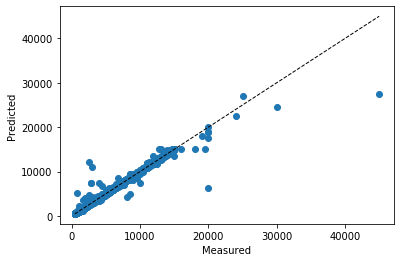

In [125]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, df2, df2.rentamount, cv=12)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Gaussian Process Regressor

In [126]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [127]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [128]:
'''kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X_train, y_train)
preds = gpr.predict(X_test)'''

'kernel = DotProduct() + WhiteKernel()\ngpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X_train, y_train)\npreds = gpr.predict(X_test)'

In [129]:
'''print("R2 Score: ",r2_score(y_test, preds))
print("Root Mean Square Error: ",mean_squared_error(y_test, preds, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, preds, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, preds))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, preds))
print("Max_Error: ", max_error(y_test, preds))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, preds))*(3207/(3208-12-1))))'''

'print("R2 Score: ",r2_score(y_test, preds))\nprint("Root Mean Square Error: ",mean_squared_error(y_test, preds, squared = False))\nprint("Mean Square Error: ",mean_squared_error(y_test, preds, squared = True))\nprint("Explained_Variance_score: ", explained_variance_score(y_test, preds))\nprint("Mean_Absolute_Error: ", mean_absolute_error(y_test, preds))\nprint("Max_Error: ", max_error(y_test, preds))\n#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))\nprint("Adjusted R2: ", (1-(1-r2_score(y_test, preds))*(3207/(3208-12-1))))'

In [130]:
'''from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(gpr, df2, df2.rentamount, cv=12)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()'''

"from sklearn import datasets\nfrom sklearn.model_selection import cross_val_predict\nfrom sklearn import linear_model\nimport matplotlib.pyplot as plt\n\n#rm = Ridge()\n#boston = datasets.load_boston()\n#y = boston.target\n\n# cross_val_predict returns an array of the same size as `y` where each entry\n# is a prediction obtained by cross validation:\npredicted = cross_val_predict(gpr, df2, df2.rentamount, cv=12)\n\nfig, ax = plt.subplots()\nax.scatter(df2.rentamount, predicted)\nax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)\nax.set_xlabel('Measured')\nax.set_ylabel('Predicted')\nplt.show()"

<h3>Partial Least Square Regression

In [131]:
from sklearn.cross_decomposition import PLSRegression

In [132]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [133]:
pls = PLSRegression()
pls.fit(X_train, y_train)

plspredict = pls.predict(X_test)

In [134]:
print("R2 Score: ",r2_score(y_test, plspredict))
print("Root Mean Square Error: ",mean_squared_error(y_test, plspredict, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, plspredict, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, plspredict))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, plspredict))
print("Max_Error: ", max_error(y_test, plspredict))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, plspredict))*(3207/(3208-12-1))))

R2 Score:  0.9214264646194967
Root Mean Square Error:  923.7572564215253
Mean Square Error:  853327.4687914236
Explained_Variance_score:  0.9214660788028107
Mean_Absolute_Error:  699.0796772357828
Max_Error:  7309.525914654692
Adjusted R2:  0.9211313527495231


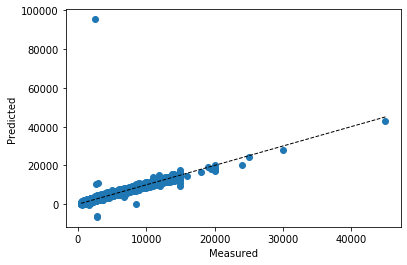

In [135]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(pls, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Gaussian Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [138]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [139]:
print("R2 Score: ",r2_score(y_test, y_pred))
print("Root Mean Square Error: ",mean_squared_error(y_test, y_pred, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, y_pred, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, y_pred))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, y_pred))
print("Max_Error: ", max_error(y_test, y_pred))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, y_pred))*(3207/(3208-12-1))))

R2 Score:  0.9581224037716591
Root Mean Square Error:  674.3891715291776
Mean Square Error:  454800.75467581046
Explained_Variance_score:  0.9582477366659531
Mean_Absolute_Error:  291.1106608478803
Max_Error:  11300
Adjusted R2:  0.9579651170252617


C:\Users\Parth Shah\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


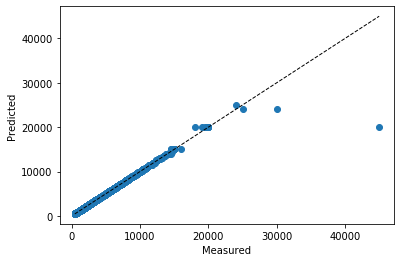

In [140]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(gnb, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Gradient Boosting Regressor

In [141]:
from sklearn.ensemble import GradientBoostingRegressor

In [142]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [143]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [144]:
pred = gbr.predict(X_test)

In [145]:
print("R2 Score: ",r2_score(y_test, pred))
print("Root Mean Square Error: ",mean_squared_error(y_test, pred, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, pred, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, pred))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, pred))
print("Max_Error: ", max_error(y_test, pred))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, pred))*(3207/(3208-12-1))))

R2 Score:  0.9938296169464238
Root Mean Square Error:  258.866456269957
Mean Square Error:  67011.84218176556
Explained_Variance_score:  0.9938310950807703
Mean_Absolute_Error:  120.54513034584572
Max_Error:  4704.704585246764
Adjusted R2:  0.9938064417988047


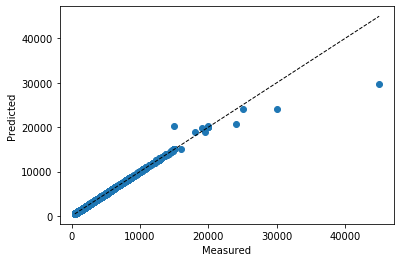

In [146]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(gbr, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Ada Boosting Regressor

In [147]:
from sklearn.ensemble import AdaBoostRegressor

In [148]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [149]:
abr = AdaBoostRegressor(random_state=0, n_estimators=100)
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [150]:
pred = abr.predict(X_test)

In [151]:
print("R2 Score: ",r2_score(y_test, pred))
print("Root Mean Square Error: ",mean_squared_error(y_test, pred, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, pred, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, pred))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, pred))
print("Max_Error: ", max_error(y_test, pred))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, pred))*(3207/(3208-12-1))))

R2 Score:  0.9481789736573493
Root Mean Square Error:  750.1925048149149
Mean Square Error:  562788.794280476
Explained_Variance_score:  0.9703002479087005
Mean_Absolute_Error:  641.2987433059778
Max_Error:  6207.527472527472
Adjusted R2:  0.94798434069456


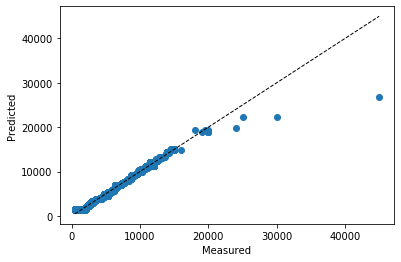

In [152]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(abr, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> XG Boost Regressor

In [153]:
import xgboost as xgb

In [154]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [155]:
xgb_model = xgb.XGBRegressor(random_state=42) #objective="reg:linear", 

In [156]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [157]:
pred = xgb_model.predict(X_test)

In [158]:
print("R2 Score: ",r2_score(y_test, pred))
print("Root Mean Square Error: ",mean_squared_error(y_test, pred, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, pred, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, pred))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, pred))
print("Max_Error: ", max_error(y_test, pred))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, pred))*(3207/(3208-12-1))))

R2 Score:  0.9969873430163111
Root Mean Square Error:  180.88166996388648
Mean Square Error:  32718.178528924353
Explained_Variance_score:  0.9969901995619329
Mean_Absolute_Error:  65.76473175201035
Max_Error:  4383.74853515625
Adjusted R2:  0.9969760278727103


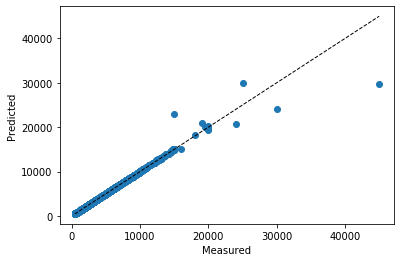

In [159]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(xgb_model, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Voting Regressor

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [161]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [162]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

In [163]:
pred = ereg.predict(X_test)

In [164]:
print("R2 Score: ",r2_score(y_test, pred))
print("Root Mean Square Error: ",mean_squared_error(y_test, pred, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, pred, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, pred))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, pred))
print("Max_Error: ", max_error(y_test, pred))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, pred))*(3207/(3208-12-1))))

R2 Score:  0.997648301623029
Root Mean Square Error:  159.8124190657627
Mean Square Error:  25540.00928765095
Explained_Variance_score:  0.9976498886391995
Mean_Absolute_Error:  58.1352708159227
Max_Error:  3268.117195915045
Adjusted R2:  0.9976394689530685


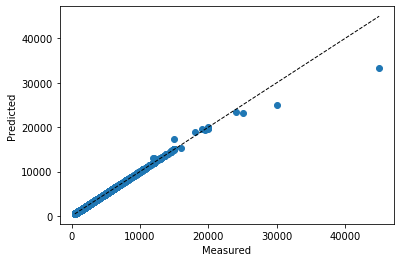

In [165]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(ereg, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3> Multi-Layer Perceptron

In [166]:
from sklearn.neural_network import MLPRegressor

In [167]:
X = df2.drop("rentamount",axis=1)
y = df2.rentamount
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [168]:
mlpr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

In [169]:
pred = mlpr.predict(X_test)

In [170]:
print("R2 Score: ",r2_score(y_test, pred))
print("Root Mean Square Error: ",mean_squared_error(y_test, pred, squared = False))
print("Mean Square Error: ",mean_squared_error(y_test, pred, squared = True))
print("Explained_Variance_score: ", explained_variance_score(y_test, pred))
print("Mean_Absolute_Error: ", mean_absolute_error(y_test, pred))
print("Max_Error: ", max_error(y_test, pred))
#print(1-(1-r2_score(predictions, y_test))*((len(X_test)-1)/(len(X_test)-12-1)))
print("Adjusted R2: ", (1-(1-r2_score(y_test, pred))*(3207/(3208-12-1))))

R2 Score:  0.9985644263846436
Root Mean Square Error:  124.8626217464787
Mean Square Error:  15590.674309404214
Explained_Variance_score:  0.9985679397913695
Mean_Absolute_Error:  74.21917267447482
Max_Error:  2273.356488457779
Adjusted R2:  0.9985590345588582


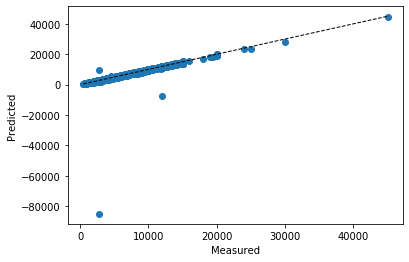

In [171]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

#rm = Ridge()
#boston = datasets.load_boston()
#y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(mlpr, df2, df2.rentamount, cv=2)

fig, ax = plt.subplots()
ax.scatter(df2.rentamount, predicted)
ax.plot([df2.rentamount.min(), df2.rentamount.max()], [df2.rentamount.min(), df2.rentamount.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()